<a href="https://colab.research.google.com/github/satria-siregar/Forecasting/blob/main/Backpropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##BACKPROPAGATION
Terdapat 3 tahapan, perhitungan maju, mencari nilai error, perhitungan mundur untuk memperbaiki prediksi berdasarkan nilai error

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam 

In [ ]:
#masukkan dataframe
df = pd.read_csv('https://raw.githubusercontent.com/satria-siregar/Forecasting/main/Backpropagation/ANTM.JK.csv')
df.head(10)
df.isnull().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [ ]:
df = df.drop(columns=['Adj Close', 'Volume'])

df.head(10)

,Date,Open,High,Low,Close
0,2005-09-29,432.588074,436.787964,407.388763,432.588074
1,2005-09-30,457.787384,457.787384,432.588074,457.787384
2,2005-10-03,470.387024,474.586914,440.987854,470.387024
3,2005-10-04,474.586914,482.986694,466.187164,474.586914
4,2005-10-05,482.986694,482.986694,466.187164,482.986694
5,2005-10-06,466.187164,482.986694,461.987274,466.187164
6,2005-10-07,470.387024,470.387024,457.787384,470.387024
7,2005-10-10,466.187164,470.387024,457.787384,466.187164
8,2005-10-11,466.187164,466.187164,461.987274,466.187164
9,2005-10-12,470.387024,474.586914,466.187164,470.387024


In [ ]:
df.index = pd.to_datetime(df.Date)

In [ ]:
df['Open']=df['Open'].fillna(df['Open'].mean())
df['High']=df['High'].fillna(df['High'].mean())
df['Low']=df['Low'].fillna(df['Low'].mean())
df['Close']=df['Close'].fillna(df['Close'].mean())


df.head()

,Date,Open,High,Low,Close
Date,,,,,
2005-09-29,2005-09-29,432.588074,436.787964,407.388763,432.588074
2005-09-30,2005-09-30,457.787384,457.787384,432.588074,457.787384
2005-10-03,2005-10-03,470.387024,474.586914,440.987854,470.387024
2005-10-04,2005-10-04,474.586914,482.986694,466.187164,474.586914
2005-10-05,2005-10-05,482.986694,482.986694,466.187164,482.986694


In [ ]:
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [ ]:
#slicing kolom
#input (x) = Open, High, Low
#Output (y) = Close
data = pd.DataFrame(df,columns=['Date','Open','High','Low','Close'])
x = data.iloc[:,1:4].values
y = data.iloc[:,-1].values
Date = data.iloc[:,0:1].values
print(x)
print(y)
print(Date)

[[ 432.588074  436.787964  407.388763]
 [ 457.787384  457.787384  432.588074]
 [ 470.387024  474.586914  440.987854]
 ...
 [2090.       2640.       2070.      ]
 [2600.       2630.       2420.      ]
 [2390.       2520.       2290.      ]]
[ 432.588074  457.787384  470.387024 ... 2600.       2420.
 2330.      ]
[['2005-09-29']
 ['2005-09-30']
 ['2005-10-03']
 ...
 ['2021-02-01']
 ['2021-02-02']
 ['2021-02-03']]


In [ ]:
#membagi data training dan data testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [ ]:
#backpropagation
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units=3, activation='relu')) #input layer, ada 3 node(unit) yaitu Open, High, Low
model.add(tf.keras.layers.Dense(units=9, activation='relu')) #hidden layer, ada 9 node(unit) didapat dari 3^2
model.add(tf.keras.layers.Dense(units=1)) #output, tanpa fungsi aktivasi. fungsi aktivasi digunakan untuk klasifikasi, sedangkan prediksi tidak pakai
model.compile(loss='mean_absolute_error',optimizer=tf.keras.optimizers.Adam(0.001))

model.fit(x_train, y_train, epochs=1000,batch_size=128) #training data sebanyak epochs (iterasi)

Epoch 1/1000
24/24 [==============================] - 0s 1ms/step - loss: 715.1400
Epoch 2/1000
24/24 [==============================] - 0s 1ms/step - loss: 595.9284
Epoch 3/1000
24/24 [==============================] - 0s 1ms/step - loss: 443.7560
Epoch 4/1000
24/24 [==============================] - 0s 1ms/step - loss: 257.6943
Epoch 5/1000
24/24 [==============================] - 0s 1ms/step - loss: 47.6255
Epoch 6/1000
24/24 [==============================] - 0s 1ms/step - loss: 18.1463
Epoch 7/1000
24/24 [==============================] - 0s 1ms/step - loss: 16.1960
Epoch 8/1000
24/24 [==============================] - 0s 1ms/step - loss: 16.1062
Epoch 9/1000
24/24 [==============================] - 0s 1ms/step - loss: 16.7184
Epoch 10/1000
24/24 [==============================] - 0s 1ms/step - loss: 15.6782
Epoch 11/1000
24/24 [==============================] - 0s 1ms/step - loss: 15.4012
Epoch 12/1000
24/24 [==============================] - 0s 1ms/step - loss: 15.9249
Epoch 13/

In [ ]:
print(model.predict(x_test))

[[1575.6632 ]
 [ 881.1863 ]
 [1811.7244 ]
 [ 773.30524]
 [1991.507  ]
 [3728.2197 ]
 [ 812.2425 ]
 [2460.902  ]
 [1272.2301 ]
 [ 809.58826]
 [ 795.1146 ]
 [ 887.8574 ]
 [ 964.6275 ]
 [ 766.30725]
 [ 708.77997]
 [ 586.6166 ]
 [ 805.3798 ]
 [ 362.68185]
 [1085.0487 ]
 [3201.5012 ]
 [ 966.7852 ]
 [ 866.0357 ]
 [ 854.0688 ]
 [ 389.40164]
 [1504.115  ]
 [ 882.04456]
 [ 956.9121 ]
 [2520.3518 ]
 [ 936.04285]
 [ 833.7035 ]
 [ 723.75275]
 [ 645.59625]
 [ 841.1172 ]
 [2146.974  ]
 [2738.77   ]
 [1567.8077 ]
 [ 726.73883]
 [1549.8911 ]
 [ 344.88068]
 [ 870.6101 ]
 [ 772.6465 ]
 [1289.8234 ]
 [1102.6418 ]
 [1345.9552 ]
 [ 676.8389 ]
 [ 770.0286 ]
 [ 626.80585]
 [ 420.33496]
 [ 685.95874]
 [1832.7592 ]
 [ 975.2558 ]
 [ 802.69714]
 [1766.7496 ]
 [2786.0618 ]
 [1401.6906 ]
 [3846.1191 ]
 [1238.5009 ]
 [1782.783  ]
 [ 778.2067 ]
 [ 917.7954 ]
 [ 391.35236]
 [ 745.02997]
 [1604.626  ]
 [ 941.0563 ]
 [2137.4717 ]
 [1591.1088 ]
 [ 348.78598]
 [2771.0203 ]
 [1142.8579 ]
 [1590.9606 ]
 [ 893.6897 ]
 [ 661

<function matplotlib.pyplot.figure>

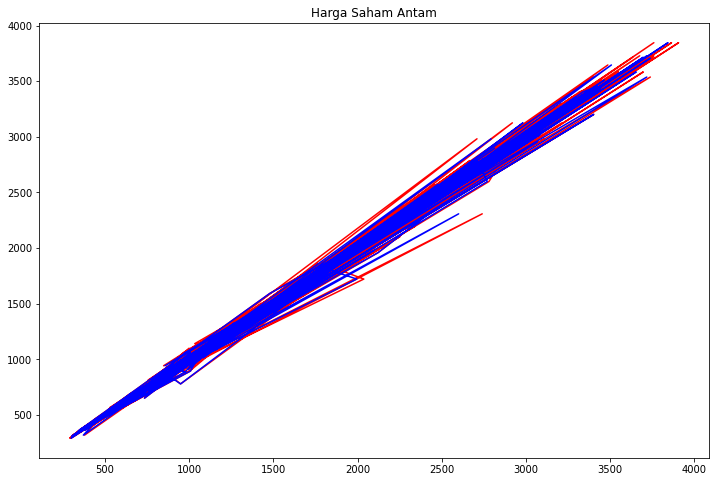

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(x_test, model.predict(x_test),'r') #data predict
plt.plot(y_test, model.predict(x_test), 'b') #data training, real
plt.title('Harga Saham Antam')
plt.figure